In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters

T = 1
n = 10
dT = T / n

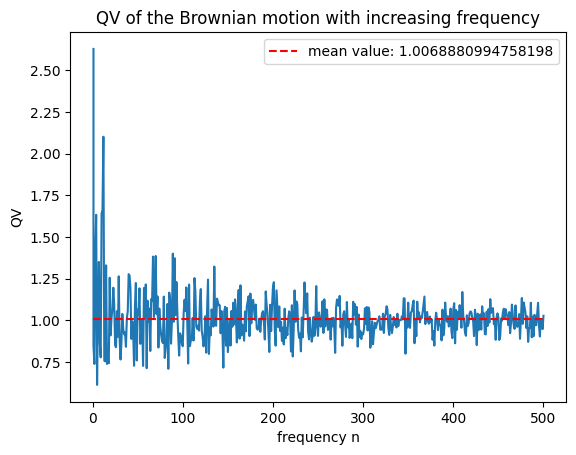

In [3]:
def noise(n: int)->np.ndarray:
  return np.random.normal(size=n)

def Brownian_motion(n: int, T: int)->np.ndarray:
  """Simulating a brownian motion for easy testing"""
  w = np.zeros(n+1)
  for i in range(1, n+1):
    w[i] = w[i-1] + np.sqrt(T/n) * np.random.normal()
  return w

def full_grid(n: int)->np.ndarray:
  return np.linspace(0, n, n+1, dtype=int)

def quadratic_variation(Z: np.ndarray, grid: np.ndarray)-> float:
  """
    Realized volatility: Compute the quadratic variation of the process Z, only considering points in grid and using the sum of squared returns
    @param Z: the process of interest
    @param grid: the grid of time increments
  """
  var = 0
  for i in range(len(grid)-1):
    var += (Z[grid[i+1]] - Z[grid[i]]) ** 2
  return var


x = np.linspace(1, 500, 501, dtype=int)
y = [quadratic_variation(Brownian_motion(n, T), full_grid(n)) for n in x]


plt.plot(x, y)
plt.plot([np.mean(y) for i in range(len(x))], "--r", label=f"mean value: {np.mean(y)}")
plt.title("QV of the Brownian motion with increasing frequency")
plt.xlabel("frequency n")
plt.ylabel("QV")
plt.legend()